In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# spikelearn
import os
os.chdir('../../')
import sys
sys.path.append('.')

from spikelearn.data import io, SHORTCUTS
from spikelearn.data.selection import select, to_feature_array

In [47]:
bad_trials = select(io.load('DRRD 7', 'no_smoothing'), is_selected=True).full.apply(lambda x: np.max(x)>20).unstack().any(axis=1)

In [74]:
io.load('ELI 3', 'no_smoothing').columns

Index(['full', 'full_times', 'cropped', 'cropped_times', 'duration', 'offset',
       'onset', 'intertrial_interval', 'is_tired', 'waveforms', 'cluster_id',
       'quality', 'area', 'is_selected', 'comments'],
      dtype='object')

In [81]:
bad = bad_trials('DRRD 10')
bad[~bad.values].index.values

array([   1,    2,    3, ..., 1669, 1670, 1671])

(0, 10000)

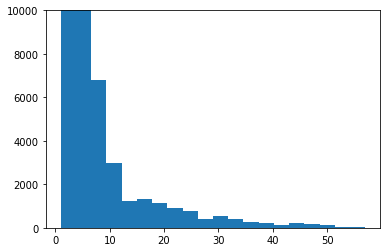

In [23]:
spikes = np.hstack(io.load('DRRD 7', 'no_smoothing').full.values)
spikes = spikes[spikes>0]
plt.hist(spikes, 20)
plt.ylim(0, 10000)

In [110]:
from spikelearn import remove_baseline

full  \
trial unit                                                      
1     0     [0.0, 0.03821960934426207, 0.6277666561340958,...   
      1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      2     [10.218610906645676, 8.938489421351946, 7.3162...   
      3     [13.443747652056423, 13.865629070010172, 9.580...   
      4     [4.40794092597241, 4.40417070766309, 5.1903495...   
      5     [4.02865879100139, 3.814206436488008, 1.799755...   
      6     [13.304990754555046, 10.990982556843871, 4.966...   
      7     [23.08760914958465, 25.393509495748773, 28.715...   
      8     [16.090352295224328, 13.460750457846935, 7.775...   
      9     [13.720509406190642, 6.534801282127907, 4.7731...   
      10    [5.896726764423935, 3.207330057815657, 0.82105...   
      11    [0.7868957363732264, 4.1060170761082615, 9.449...   
      12    [5.904292845999965, 3.4957362351228927, 2.4339...   
      13    [7.123029656239864, 5.1489461724694126, 4.6999...   
      14    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      15    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      16    [8.57899119840657, 10.969012498377182, 17.7170...   
      17    [6.8471249726404615, 6.254851333610045, 8.0359...   
      18    [19.466288545439397, 23.234396289862566, 26.76...   
      19    [0.8642408483843576, 5.7129149963678145, 15.87...   
      20    [6.4490925486754564, 4.364659192166601, 4.3672...   
      21    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      22    [7.585344931708665, 8.80120021649915, 11.86092...   
      23    [0.8065352727003906, 3.5523214522117526, 7.053...   
      24    [19.389889337779174, 13.949385956621462, 8.347...   
      25    [12.646366165303121, 12.737951800200936, 18.95...   
      26    [1.1199790860285668, 3.0321539815105454, 3.709...   
      27    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      28    [0.20521268183746183, 1.3214338711891804, 3.37...   
      29    [10.118759825295792, 12.095606078455878, 14.96...   
...                                                       ...   
801   33    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      34    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      35    [6.863790527385143, 11.358362727565089, 9.7891...   
      36    [4.0745128206517425, 7.27336632440373, 6.21734...   
      37    [6.436636013905169, 13.926291318783466, 18.650...   
      38    [9.774923505042237, 13.122409790781587, 10.714...   
      39    [0.056996426449837365, 0.6533437538326341, 2.5...   
      40    [2.1276297558186563, 6.232308399523205, 10.150...   
      41    [8.461646204502518, 14.663773078406049, 12.217...   
      42    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      43    [0.0, 0.010586980426845898, 0.5307910053995138...   
      44    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      45    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      46    [11.777774357048761, 9.675166768396243, 6.7128...   
      47    [5.838969687684417, 12.648513997261722, 13.693...   
      48    [0.32486460206247875, 1.6949640453174526, 3.63...   
      49    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      50    [11.86303995898536, 23.779243506799624, 23.238...   
      51    [11.265454775533671, 17.631246931192514, 16.15...   
      52    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      53    [2.3541520290489064, 3.771074617101477, 2.8900...   
      54    [2.7218303340635077, 6.086001700460221, 6.9211...   
      55    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      56    [2.064862971406991, 3.672365674327307, 3.09094...   
      57    [4.388667389136288, 7.284109995305992, 5.99920...   
      58    [18.652743032854072, 32.792950789589824, 34.14...   
      59    [20.70832410258501, 35.33906621419408, 35.0277...   
      60    [2.064862971406991, 3.672365674327307, 3.09094...   
      61    [10.860372988063164, 24.065667489829977, 27.46...   
      62    [4.206137925799

In [126]:
rat = 'DRRD 7'
dset= 'wide_smoothed'
data = select(io.load(rat, dset), _min_duration=1.5, _max_duration=4.5, is_tired=False)
data = data[~data.reset_index().trial.isin(bad_trials(rat)).values]
if rat in SHORTCUTS['groups']['DRRD']:
    data = select(data, is_selected=True, _min_duration=1.5, _max_duration=4.5, is_tired=False)
else:
    data = select(data, _min_quality=0, _min_duration=1.5, _max_duration=4.5, is_tired=False)
data = to_feature_array(data, Xyt=False, subset='full')

In [128]:
remove_baseline(data, io.load(rat, 'baseline'), .5)

unit                  0          2          4          6         7   \
trial time                                                            
14    -500.0   -1.580371  29.750279  -1.907788  10.162537  0.000000   
      -400.0    0.253624  19.338144  -1.152467   7.111658  0.000000   
      -300.0    1.820124   3.273934   0.827267   5.441032  0.000000   
      -200.0    2.338246 -20.454373   1.793802  -3.061164  0.000000   
      -100.0    2.567567 -33.203695   0.436215 -11.036456  0.130606   
       0.0      3.717568 -33.287194   0.461050  -8.521359  1.050044   
       100.0    2.739710 -31.985891   2.604733  -2.639668  3.484060   
       200.0   -0.329857 -31.861518   5.219441   0.092686  5.667668   
       300.0   -0.008047 -28.503738   9.013849   1.753603  5.953245   
       400.0    4.590676 -22.246539  10.000578  -3.220720  5.241630   
       500.0    5.376473 -18.490123   8.108710 -12.879974  4.665797   
       600.0    1.677578 -15.985475   8.935092  -8.200575  2.988194   
       700.0   -1.741034   1.898762  12.484794  26.130422  1.639389   
       800.0   -2.757646  34.114898  11.869063  66.788918  2.853062   
       900.0   -1.881934  47.193256   6.873919  73.735708  3.788470   
       1000.0  -1.815400  28.758524   3.740756  50.845423  2.081037   
       1100.0   0.218029   8.872173   7.048188  39.868223  0.456031   
       1200.0   3.739275  14.202169  13.378265  58.576126  0.027514   
       1300.0   4.102895  34.374672  12.880383  75.708557  0.000000   
       1400.0   3.929659  37.569978   6.746967  58.075206  0.000000   
22    -500.0    6.014359  -3.923898   8.509208  -9.486121  0.000000   
      -400.0    2.912041  -2.940300   2.075784  -7.991686  0.000000   
      -300.0   -1.384020   0.494335  -2.629950  -5.530932  0.000000   
      -200.0   -3.548836   3.630585  -3.085789   5.745011  0.000000   
      -100.0   -3.980171   1.515096   0.064436  17.572025  0.000000   
       0.0     -4.000000   0.493171   4.709652  16.365167  0.000000   
       100.0   -4.000000   9.319078   5.939499  10.633725  0.000000   
       200.0   -3.966511  25.152536   5.582968  15.597220  0.000000   
       300.0   -3.140502  30.859341   5.809566  24.458493  0.000000   
       400.0    0.640114  24.736854   4.903730  23.578661  0.000000   
...                  ...        ...        ...        ...       ...   
999    500.0   -2.000000 -14.000000  -2.000000  -2.000000 -5.994324   
       600.0   -1.948645 -13.965463  -2.000000  -1.987343 -6.000000   
       700.0   -1.107010 -12.702501  -1.936489  -1.664695 -6.000000   
       800.0    2.906708  -6.033597  -0.761535  -0.242432 -5.709732   
       900.0   10.068884   6.924541   4.320196   1.670884 -3.825342   
       1000.0  11.639895  12.251316  12.234812   1.071502  0.272423   
       1100.0   5.125221   3.052899  13.073826  -0.971836  1.257437   
       1200.0   1.185511  -8.329103   6.883102  -1.869394 -2.627789   
       1300.0   3.562670 -13.163746   1.424460  -2.000000 -5.374216   
       1400.0   7.386760 -13.980855  -1.272309  -2.000000 -5.979407   
1000  -500.0    4.108813   4.501005   2.501121   0.579361  0.000000   
      -400.0    2.873264  -1.087776   3.331085  -1.267907  0.000000   
      -300.0    0.614754  -4.324504   2.027526  -3.355811  0.000000   
      -200.0   -1.967520  -4.000632  -2.154030  -2.680269  0.000000   
      -100.0   -3.320136  -2.246994  -2.942126  -0.431335  0.074217   
       0.0     -1.055404  -4.606233   0.547530  -2.615858  0.752561   
       100.0   -0.809786  -8.384026   1.082562  -6.384026  2.677505   
       200.0   -4.217486  -9.817409  -2.910255  -7.817409  3.807212   
       300.0   -4.913234 -10.000000  -5.461462  -8.000000  2.169342   
       400.0   -4.163582 -10.000000  -5.988520  -8.000000  0.493260   
       500.0   -5.697032 -10.000000  -6.000000  -8.000000  0.032589   
       600.0   -7.231274 -10.000000  -6.000000  -8.000000  0.000000   
       700.0   -6.555639 -10.000000  -6.000000  -8.000000  0.000000   
       800.0   -4.016562

In [93]:
def bad_trials(label, threshold=20, only_indexes=True):
    data = io.load(label, 'no_smoothing')
    if 'quality' in data.columns:
        bad = select(data, _min_quality=0).full.apply(lambda x: np.max(x)>threshold).unstack().any(axis=1)
    else:
        bad = select(data, is_selected=True).full.apply(lambda x: np.max(x)>threshold).unstack().any(axis=1)
        
    if only_indexes:
        return bad[bad.values].index.values
    else:
        return bad

In [94]:
data = select(io.load('DRRD 10', 'wide_smoothed'), _min_duration=1.5, _max_duration=4.5, is_tired=False)
gdata = data[~data.reset_index().trial.isin(bad_trials('DRRD 10')).values]